In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
#Load the iris dataset
iris = load_iris()

In [6]:
#create x features and y response
x = iris.data
y = iris.target

In [7]:
#train/test split the data with different random state
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4)

#check the classification accuracy where k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9736842105263158


In [9]:
#similary calculate accuracy for different set random_state = 3
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3)

#check the classification accuracy where k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9473684210526315


In [10]:
# For each set of data the accuracy_score vary so we go the k-fold cross validation
#simulate splitting of data of 25 observation into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [11]:
#cross validation : parameter tuning
from sklearn.model_selection import cross_val_score

In [12]:
#10 fold cross validation for KNN where k = 5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [13]:
print(scores.mean())

0.9666666666666668


In [14]:
#search for optimal value of k for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'accuracy score')

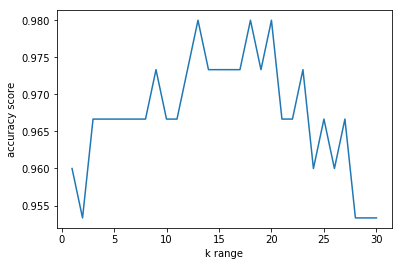

In [15]:
#It is difficult to analysis the above result so we will use matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,k_scores)
plt.xlabel("k range")
plt.ylabel("accuracy score")

In [ ]:
#from the above plot it is concluded that k range from 12-20 shows max accuracy scores . so we select max k=20

In [16]:
#select the best model by comparing the accuracy score of knn and logistic regression
knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.9800000000000001


In [17]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores = cross_val_score(logreg,x,y,cv=10,scoring='accuracy')
print(scores.mean())

0.9533333333333334


/Users/saravanan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/saravanan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/saravanan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/saravanan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/saravanan/anaconda3/lib/python3.7/site-packages/skl

In [ ]:
#From the above result we select KNN which is better than LogisticRegression

In [18]:
#cross validation : feature selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 

In [21]:
data = pd.read_csv('Advertising.csv')
feature_cols = ['TV','Radio','Newspaper']
x = data[feature_cols]
y = data['Sales']

In [24]:
lm = LinearRegression()
score = cross_val_score(lm,x,y,cv=10,scoring='neg_mean_squared_error')
print(score)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [27]:
mse_error = -score
print(mse_error)

#calculate root mean squared error
rmse_error = np.sqrt(mse_error)
print(rmse_error)

#calculate the average
print(rmse_error.mean())

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]
[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]
1.6913531708051797


In [29]:
# Root mean squared score for TV and Radio
feature_cols = ['TV','Radio']
x = data[feature_cols]
y = data['Sales']
print(np.sqrt(-cross_val_score(lm,x,y,cv=10,scoring='neg_mean_squared_error')).mean())

1.6796748419090766


In [ ]:
#TV and Radio produce less error compare to TV